In [1]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
mask = cv2.imread("/home/ana/University/Tamgi/data/dataset/mask/0/0a0.png", cv2.IMREAD_GRAYSCALE)

In [14]:
mask.shape

(600, 600)

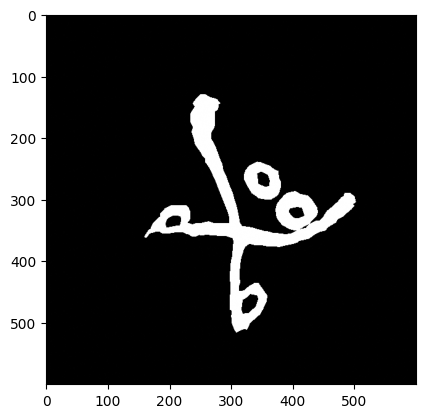

In [12]:
plt.imshow(mask, cmap='gray')

[159, 130, 502, 516]


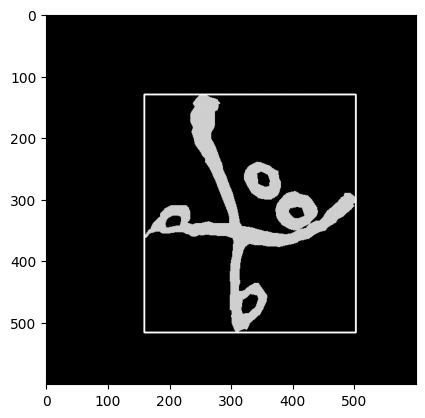

In [13]:
segmentation = np.where(mask > 128)
bbox = [0, 0, 0, 0]
bbox[0] = np.min(segmentation[1])
bbox[1] = np.min(segmentation[0])
bbox[2] = np.max(segmentation[1])
bbox[3] = np.max(segmentation[0])
plt.imshow(cv2.rectangle(mask, (bbox[0], bbox[1]), (bbox[2], bbox[3]), 255, 2), cmap='gray')
print(bbox)

In [5]:
def create_markup(masks_path: str, save_path: str):
    results = {}
    for mask_dir in os.listdir(masks_path):
        for mask_path in os.listdir(os.path.join(masks_path, mask_dir)):
            try:
                mask = cv2.imread(os.path.join(masks_path, mask_dir, mask_path), cv2.IMREAD_GRAYSCALE)
                segmentation = np.where(mask > 128)
                bbox = [0, 0, 0, 0]
                bbox[0] = int(np.min(segmentation[1]))
                bbox[1] = int(np.min(segmentation[0]))
                bbox[2] = int(np.max(segmentation[1]))
                bbox[3] = int(np.max(segmentation[0]))
                results[os.path.join(mask_dir, mask_path)] = bbox
            except:
                print(os.path.join(mask_dir, mask_path))
    with open(save_path, "w") as f:
        json.dump(results, f)

In [6]:
create_markup("/home/ana/University/Tamgi/data/dataset/mask", 
              "/home/ana/University/Tamgi/data/dataset/labels/annotations.json")

In [1]:
data = [
    "/home/ana/University/Tamgi/data/dataset/mask/0/8_6.jpg",
    "/home/ana/University/Tamgi/data/dataset/mask/0/5_10.jpg", 
    "/home/ana/University/Tamgi/data/dataset/mask/0/12_8.jpg",
    "/home/ana/University/Tamgi/data/dataset/mask/1/1_2.jpg",
    "/home/ana/University/Tamgi/data/dataset/mask/1/5_6.jpg",
    "/home/ana/University/Tamgi/data/dataset/mask/1/8_19.jpg",
    "/home/ana/University/Tamgi/data/dataset/mask/3/2_1.jpg",
    "/home/ana/University/Tamgi/data/dataset/mask/3/5_10.jpg",
    "/home/ana/University/Tamgi/data/dataset/mask/3/5_13.jpg"
]

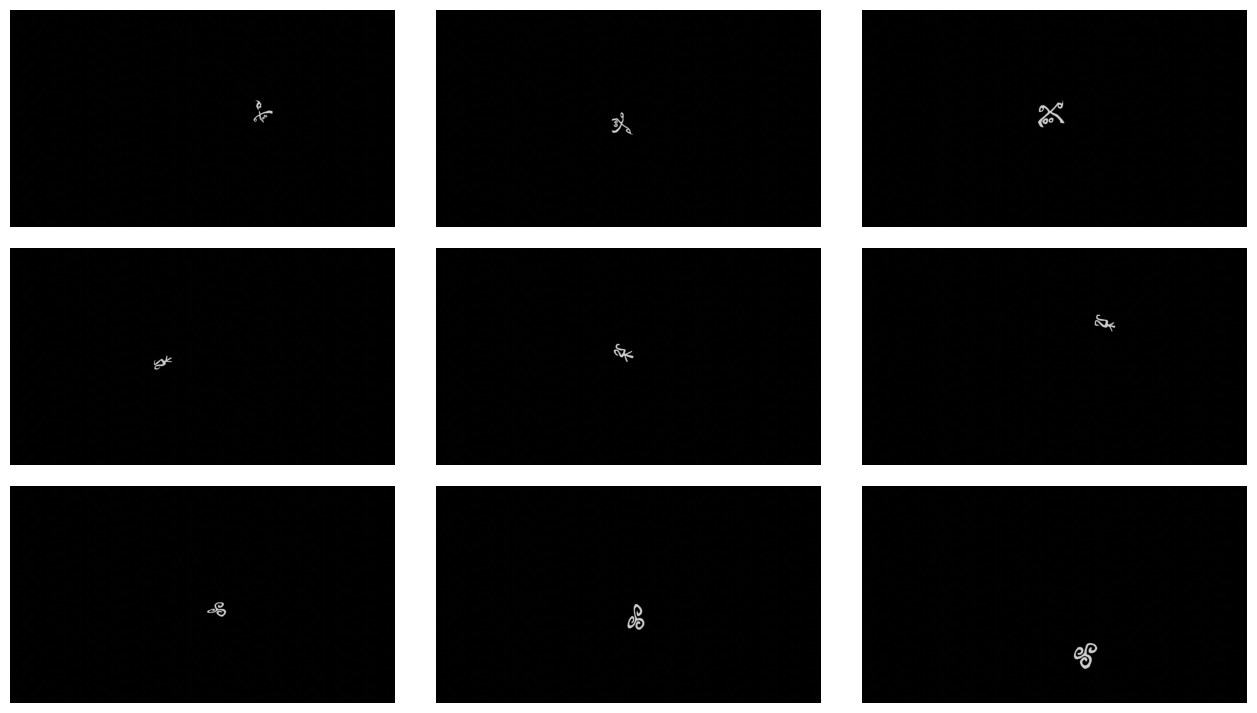

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 

# Generate some sample images for demonstration
def generate_sample_image(size):
    return np.random.rand(size, size)

# Create a 3x3 grid of images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 9))

# Iterate over each subplot and display an image
for i, ax in enumerate(axes.flat):
    image = cv2.cvtColor(cv2.imread(data[i]), cv2.COLOR_BGR2RGB)
    ax.imshow(image, cmap='viridis')
    ax.axis('off')  # Turn off the axis

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the grid
plt.show()